In [ ]:
pip install jupyter



In [ ]:
pip install jupyter



In [ ]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [45]:
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy import stats

des = df.transpose().describe()
des_mean = des.loc['mean']

x = des_mean.index
y = des_mean.values
des_sigma = des.loc['std']
sigma = des_sigma / np.sqrt(len(df.columns))
conf_int = stats.norm.interval(0.95, loc=y, scale=sigma)
conf_yerr = [y-conf_int[0],conf_int[1]-y]
conf_yerr

[array([ 6508.77836744,  3192.19565527,  4553.81860807,  2263.8101455 ]),
 array([ 6508.77836744,  3192.19565527,  4553.81860807,  2263.8101455 ])]

<IPython.core.display.Javascript object>


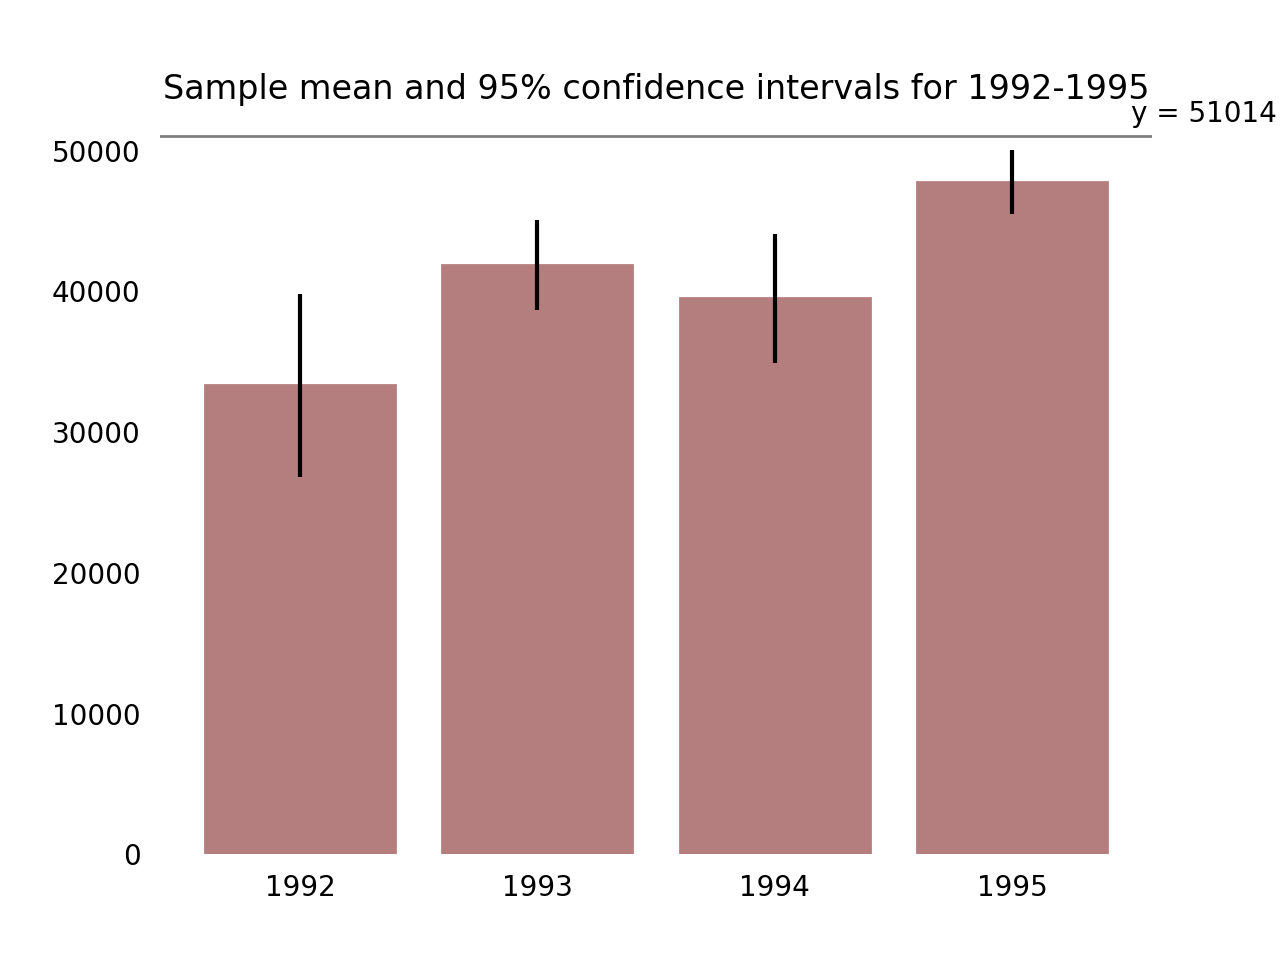

In [67]:
def plot(ydata):
    barchart = plt.bar(x,y, width=0.8, yerr=conf_yerr)
    plt.title('Sample mean and 95% confidence intervals for 1992-1995')
    ax = plt.gca()
    ax.set_xticks(x)
    plt.tick_params('both', bottom=False, left=False)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    color(ydata,barchart)
    plt.axhline(ydata, color='gray', linewidth=1)
    ax.text(barchart[-1].get_x()+0.9, ydata+1000, 'y = ' + str(int(ydata)), color = '#000000',fontsize=10, ha ='left')
    
def color(ydata,barchart):
    below = x[ydata<conf_int[0]]
    above = x[ydata>conf_int[1]]
    for bar in barchart:
        if int(bar.get_x()+0.5) in below:
            bar.set_color('#7E91B5')
        elif int(bar.get_x()+0.5) in above:
            bar.set_color('#B57E7E')
        else:
            bar.set_color('#B2B2B2')
    
def onclick(event):
    plt.cla()
    plot(event.ydata)

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

plot(np.mean(y))